# Pivot‑Table Practice Lab (21 Questions)

Each question simulates a small DataFrame.  
**Your task:** create the requested pivot table (or tidy reshape) *below the simulation cell*.
Once you are finished, you can meet with your group. 

---



# Tidy Data Frame

A **tidy data frame** follows three simple rules:

1. **Each variable** is a column.  
2. **Each observation** (or case) is a row.  
3. **Each value** is a single cell.

For example, this is _tidy_:

| country | year | population |
| ------- | ---- | ---------- |
| A       | 2000 | 1,000,000  |
| A       | 2010 | 1,100,000  |
| B       | 2000 | 500,000    |
| B       | 2010 | 600,000    |


Here “country”, “year”, and “population” are each their own columns, and every row is one observation.

---

# Pivot Table

A **pivot table** is a way to **reshape** and **summarize** data:

- **Rows** and **columns** become grouping variables.  
- **Cell values** are computed by applying an aggregation (sum, mean, count, etc.) to the data in each group.

Using the same data, a pivot table showing population by country and year might look like:

| country | 2000      | 2010      |
| ------- | --------- | --------- |
| A       | 1,000,000 | 1,100,000 |
| B       | 500,000   | 600,000   |


Here we’ve “pivoted” the year values into separate columns and filled in the population.

---

# Wide vs. Long Format

- **Wide format**  
  - Variables that could be rows (e.g. “year”) become separate columns.  
  - Good for human‐readable tables or specific plotting functions.  

| country | pop\_2000 | pop\_2010 |
| ------- | --------- | --------- |
| A       | 1,000,000 | 1,100,000 |
| B       | 500,000   | 600,000   |


- **Long format**  
- Each row is one measurement; variable names live in a single column, with their values in another.  
- Ideal for most data‐analysis and plotting libraries (e.g., pandas “melt”).

| country | year | population |
| ------- | ---- | ---------- |
| A       | 2000 | 1,000,000  |
| A       | 2010 | 1,100,000  |
| B       | 2000 | 500,000    |
| B       | 2010 | 600,000    |



# Useful commands

In [1]:
import pandas as pd

# Sample long DataFrame
df = pd.DataFrame({
  'country': ['A','A','B','B'],
  'year':    [2000,2010,2000,2010],
  'population': [1_000_000,1_100_000,500_000,600_000]
})

In [2]:
# 1. Long → Wide with pivot (no aggregation)
df_wide = df.pivot(index='country', columns='year', values='population')

df_wide

year,2000,2010
country,,
A,1000000,1100000
B,500000,600000


In [3]:
# 2. Long → Wide with aggregation (sum, mean, etc.)
df_pt = df.pivot_table(
  index='country',
  columns='year',
  values='population',
  aggfunc='sum'
)

df_pt

year,2000,2010
country,,
A,1000000,1100000
B,500000,600000


In [4]:
# 3. Wide → Long with melt
df_wide_reset = df_wide.reset_index()  # bring 'country' back to a column
df_long = df_wide_reset.melt(
  id_vars='country',
  var_name='year',
  value_name='population'
)

df_long

,country,year,population
0,A,2000,1000000
1,B,2000,500000
2,A,2010,1100000
3,B,2010,600000


In [5]:
# 4. Tidying a more complex wide table
# Suppose you have separate year columns: pop_2000, pop_2010
df2 = pd.DataFrame({
  'country': ['A','B'],
  'pop_2000': [1_000_000, 500_000],
  'pop_2010': [1_100_000, 600_000]
})
df2_long = df2.melt(
  id_vars='country',
  value_vars=['pop_2000','pop_2010'],
  var_name='year',
  value_name='population'
)
# Clean up 'year' values
df2_long['year'] = df2_long['year'].str.replace('pop_','').astype(int)

df2_long

,country,year,population
0,A,2000,1000000
1,B,2000,500000
2,A,2010,1100000
3,B,2010,600000


## Question 1 — Region × Units Sold

Create a pivot table that shows **total units** sold in each region (i.e. region | units, use pd.pivot_table)

In [6]:
import pandas as pd, numpy as np
np.random.seed(0)
regions = ['North','South','East','West']
items = ['Widget']
df = pd.DataFrame({
    'region': np.random.choice(regions, size=20),
    'item': 'Widget',
    'units': np.random.randint(1, 11, 20)
})
df.head()

pivot_table = df.pivot_table(index = "region", values = "units", aggfunc = "sum")
pivot_table


,units
region,
East,4
North,36
South,26
West,46


<details><summary><strong>Show Solution</strong></summary>

```python
pd.pivot_table(df, index='region', values='units', aggfunc='sum')
```

</details>

## Question 2 — Average Temperature per City

Compute the **average temperature** for each city using a pivot table (use pivot_table)

In [7]:
np.random.seed(1)
cities = ['Boston','Chicago','Seattle']
dates = pd.date_range('2025-07-01', periods=15)
df = pd.DataFrame({
    'city': np.random.choice(cities, size=45),
    'date': np.tile(dates, 3),
    'temp_C': np.random.normal(25, 3, 45)
})
df.head()

pivot_table = df.pivot_table(index = "city", values = "temp_C", aggfunc = "mean")
pivot_table


,temp_C
city,
Boston,24.596432
Chicago,25.396862
Seattle,26.058069


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='city', values='temp_C', aggfunc='mean')
```

</details>

## Question 3 — Count Students by Grade

Produce a pivot table counting how many students earned each grade.

In [8]:
np.random.seed(2)
grades = ['A','B','C','D']
df = pd.DataFrame({
    'student_id': range(1,51),
    'grade': np.random.choice(grades, 50)
})
df.head()

pivot_table = df.pivot_table(index = "grade", values = "student_id", aggfunc = "count")
pivot_table


,student_id
grade,
A,12
B,7
C,12
D,19


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='grade', values='student_id', aggfunc='count')
```

</details>

## Question 4 — Quarterly Department Expenses

Pivot the table so **quarters become columns** and expenses fill values. Use pd.pivot.

In [9]:
np.random.seed(3)
depts = ['HR','IT','Sales']
quarters = ['Q1','Q2','Q3','Q4']
records = [(d,q,np.random.randint(5000,20000)) for d in depts for q in quarters]
df = pd.DataFrame(records, columns=['department','quarter','expense'])
df.head()

df_pivot = df.pivot(index = "department", columns = "quarter", values = "expense")
df_pivot

quarter,Q1,Q2,Q3,Q4
department,,,,
HR,10994,6688,16513,14859
IT,14160,11400,13981,16261
Sales,7707,19026,16115,12161


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot(index='department', columns='quarter', values='expense')
```

</details>

## Question 5 — Wide‑to‑Long Patient BP

Melt the DataFrame to long form with columns: patient, day, bp.

In [10]:
np.random.seed(4)
df = pd.DataFrame({
    'patient':['P1','P2','P3'],
    'day1': np.random.randint(110,130,3),
    'day2': np.random.randint(110,130,3),
    'day3': np.random.randint(110,130,3)
})
df

df_melted = df.melt(id_vars = "patient", var_name = "day", value_name = "bp")
df_melted


,patient,day,bp
0,P1,day1,124
1,P2,day1,115
2,P3,day1,111
3,P1,day2,118
4,P2,day2,118
5,P3,day2,128
6,P1,day3,119
7,P2,day3,117
8,P3,day3,123


<details><summary><strong>Show Solution</strong></summary>

```python
df_long = df.melt(id_vars='patient', var_name='day', value_name='bp')
```

</details>

## Question 6 — Mean Score by Class & Subject

Pivot to show **average score** per class (rows) and subject (columns).

In [11]:
np.random.seed(5)
classes = ['A','B']
subjects = ['Math','History','Science']
records=[(c,s,np.random.randint(50,101)) for c in classes for s in subjects for _ in range(5)]
df=pd.DataFrame(records, columns=['class','subject','score'])
df.head()

pivot_table = df.pivot_table(index = "class", columns = "subject", values = "score", aggfunc = "mean")
pivot_table

subject,History,Math,Science
class,,,
A,73.8,80.0,72.6
B,73.2,79.2,69.8


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='class', columns='subject', values='score', aggfunc='mean')
```

</details>

## Question 7 — Satisfaction Counts by Gender

Count satisfied vs not by gender (rows=gender, cols=satisfied).

In [12]:
np.random.seed(6)
df = pd.DataFrame({
    'gender': np.random.choice(['F','M'], 30),
    'satisfied': np.random.choice([0,1], 30)
})
df.head()

pivot_table = df.pivot_table(index = "gender", values = "satisfied", aggfunc = "count")
pivot_table

,satisfied
gender,
F,15
M,15


<details><summary><strong>Show Solution</strong></summary>

```python
pd.pivot_table(df, index='gender', columns='satisfied', values='satisfied', aggfunc='count', fill_value=0)
```

</details>

## Question 8 — Handle Missing Units Before Pivot

Fill missing units with 0, then sum units per store×category.

In [13]:
np.random.seed(7)
df = pd.DataFrame({
    'store': np.random.choice(['A','B','C'], 15),
    'category': np.random.choice(['X','Y'], 15),
    'units': np.random.randint(1,20,15).astype(float)
})
# Introduce missing
df.loc[df.sample(5).index, 'units'] = np.nan
df.head()

df_fill = df.fillna({"units" : 0})
pivot_table = df_fill.pivot_table(index = "store",  columns = "category", values = "units", aggfunc = "sum")
pivot_table



category,X,Y
store,,
A,16.0,26.0
B,15.0,15.0
C,4.0,24.0


<details><summary><strong>Show Solution</strong></summary>

```python
df_filled = df.fillna({'units':0})
df_filled.pivot_table(index='store', columns='category', values='units', aggfunc='sum')
```

</details>

## Question 9 — Split Year‑Month Column

Split year_month into separate year and month columns, then pivot to show total sales by month (columns) for each year.

In [14]:
np.random.seed(8)
df = pd.DataFrame({
    'year_month': ['2025-01','2025-02','2025-01','2025-02'],
    'sales': np.random.randint(100,200,4)
})
df

df[["year", "month"]] = df["year_month"].str.split("-", expand = True)
pivot_table = df.pivot_table(index = "year", columns = "month", values = "sales", aggfunc = "sum")
pivot_table

month,01,02
year,,
2025,272,374


<details><summary><strong>Show Solution</strong></summary>

```python
df[['year','month']] = df['year_month'].str.split('-', expand=True)
df.pivot_table(index='year', columns='month', values='sales', aggfunc='sum')
```

</details>

## Question 10 — Trim Whitespace Categories

Strip whitespace in 'team ' column, then average score per team.

In [15]:
np.random.seed(9)
df = pd.DataFrame({
    'team ': [' Red','Blue ',' Red','Blue '],
    'score': np.random.randint(10,30,4)
})
df

df["team"] = df["team "].str.strip()
pivot_table = df.pivot_table(index = "team", values = "score", aggfunc = "mean")
pivot_table

,score
team,
Blue,14.5
Red,19.0


<details><summary><strong>Show Solution</strong></summary>

```python
df['team '] = df['team '].str.strip()
df.pivot_table(index='team ', values='score', aggfunc='mean')
```

</details>

## Question 11 — Duplicate Keys Needing Aggregation

Create a pivot table of **total revenue** per date with products as columns.

In [16]:
np.random.seed(10)
df = pd.DataFrame({
    'date': pd.date_range('2025-01-01', periods=6, freq='D').repeat(2),
    'product': ['A','B']*6,
    'revenue': np.random.randint(50,150,12)
})
df.head()

pivot_table = df.pivot_table(index = "date", columns = "product", values = "revenue", aggfunc = "sum")
pivot_table

product,A,B
date,,
2025-01-01,59,65
2025-01-02,114,78
2025-01-03,139,143
2025-01-04,79,58
2025-01-05,123,50
2025-01-06,90,86


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='date', columns='product', values='revenue', aggfunc='sum')
```

</details>

## Question 12 — Mean & Std in Same Pivot

Produce pivot with both mean and std of measure for each group.

In [17]:
np.random.seed(11)
df = pd.DataFrame({
    'group': np.random.choice(['G1','G2'], 30),
    'measure': np.random.normal(0,1,30)
})
df.head()

pivot_table = df.pivot_table(index = "group", values = "measure", aggfunc = ["mean", "std"])
pivot_table

,mean,std
,measure,measure
group,,
G1,-0.254744,0.951633
G2,-0.050687,0.760760


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='group', values='measure', aggfunc=['mean','std'])
```

</details>

## Question 13 — Remove Duplicates Before Pivot

Keep only the latest status per id (keep first occurrence), then pivot status as columns and value as values.

In [18]:
np.random.seed(12)
df = pd.DataFrame({
    'id': np.r_[np.arange(1,6), np.arange(1,6)],
    'status': ['new','old']*5,
    'value': np.random.randint(1,100,10)
})
df

df_latest = df.drop_duplicates("id", keep = "first")
df_pivot = df_latest.pivot(index = "id", columns = "status", values = "value")
df_pivot


status,new,old
id,,
1,76.0,NaN
2,NaN,28.0
3,7.0,NaN
4,NaN,3.0
5,4.0,NaN


<details><summary><strong>Show Solution</strong></summary>

```python
latest = df.drop_duplicates('id', keep='first')
latest.pivot(index='id', columns='status', values='value')
```

</details>

## Question 14 — Monthly Sales Trend

Convert 'date' to datetime, extract month, then sum sales per month.

In [19]:
np.random.seed(13)
dates = pd.date_range('2025-01-01','2025-06-30', freq='D')
df = pd.DataFrame({
    'date': np.random.choice(dates, 100),
    'sales': np.random.randint(20,80,100)
})
df.head()

df["month"] = pd.to_datetime(df["date"]).dt.to_period("M")
pivot_table = df.pivot_table(index = "month", values = "sales", aggfunc = "sum")
pivot_table

,sales
month,
2025-01,1171
2025-02,547
2025-03,900
2025-04,469
2025-05,1115
2025-06,1121


<details><summary><strong>Show Solution</strong></summary>

```python
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.pivot_table(index='month', values='sales', aggfunc='sum')
```

</details>

## Question 15 — Sensor Readings Wide to Long

Melt to long form with columns timestamp, sensor, reading.

In [20]:
np.random.seed(14)
df = pd.DataFrame({
    'timestamp': pd.date_range('2025-07-15 00:00', periods=5, freq='h'),
    'sensorA': np.random.rand(5),
    'sensorB': np.random.rand(5)
})
df

df_melt = df.melt(id_vars = "timestamp", var_name = "sensor", value_name = "reading")
df_melt


,timestamp,sensor,reading
0,2025-07-15 00:00:00,sensorA,0.513943
1,2025-07-15 01:00:00,sensorA,0.773165
2,2025-07-15 02:00:00,sensorA,0.870428
3,2025-07-15 03:00:00,sensorA,0.008047
4,2025-07-15 04:00:00,sensorA,0.309736
5,2025-07-15 00:00:00,sensorB,0.957604
6,2025-07-15 01:00:00,sensorB,0.513117
7,2025-07-15 02:00:00,sensorB,0.318284
8,2025-07-15 03:00:00,sensorB,0.539200
9,2025-07-15 04:00:00,sensorB,0.221255


<details><summary><strong>Show Solution</strong></summary>

```python
df_long = df.melt(id_vars='timestamp', var_name='sensor', value_name='reading')
```

</details>

## Question 16 — Compute Conversion Rate

Pivot to compute **conversion rate** (mean of converted) per campaign.

In [21]:
np.random.seed(15)
df = pd.DataFrame({
    'campaign': np.random.choice(['Email','Ads'], 50),
    'converted': np.random.choice([0,1], 50)
})
df.head()

pivot_table = df.pivot_table(index = "campaign", values = "converted", aggfunc = "mean")
pivot_table


,converted
campaign,
Ads,0.433333
Email,0.450000


<details><summary><strong>Show Solution</strong></summary>

```python
df.pivot_table(index='campaign', values='converted', aggfunc='mean')
```

</details>

## Question 17 — Split Category/Subcategory

Separate cat_sub into cat and sub, then sum qty with cat rows and sub columns.

In [22]:
np.random.seed(16)
df = pd.DataFrame({
    'cat_sub': ['A_X','A_Y','B_X','B_Y']*5,
    'qty': np.random.randint(1,5,20)
})
df.head()

df["cat"] = df["cat_sub"].str.split("_").str[0]
df["sub"] = df["cat_sub"].str.split("_").str[1]
pivot_table = df.pivot_table(index = "cat", columns = "sub", values = "qty", aggfunc = "sum")
pivot_table

sub,X,Y
cat,,
A,12,14
B,7,9


<details><summary><strong>Show Solution</strong></summary>

```python
df[['cat','sub']] = df['cat_sub'].str.split('_', expand=True)
df.pivot_table(index='cat', columns='sub', values='qty', aggfunc='sum')
```

</details>

## Question 18 — Ordered Categories in Pivot

Set 'priority' as categorical ordered low<medium<high, then count tickets per priority (rows).

In [23]:
np.random.seed(17)
df = pd.DataFrame({
    'priority': np.random.choice(['low','medium','high'], 30),
    'tickets': 1
})
df.head()

df["priority"] = pd.Categorical(df["priority"], categories = ["low", "medium", "high"], ordered = True)
pivot_table = df.pivot_table(index = "priority", values = "tickets", aggfunc = "count")
pivot_table


/var/folders/mx/cv_f44qs0m57p0lzjb0p91kh0000gn/T/ipykernel_87006/2772646116.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index = "priority", values = "tickets", aggfunc = "count")


,tickets
priority,
low,6
medium,14
high,10


<details><summary><strong>Show Solution</strong></summary>

```python
df['priority'] = pd.Categorical(df['priority'], categories=['low','medium','high'], ordered=True)
df.pivot_table(index='priority', values='tickets', aggfunc='count').sort_index()
```

</details>

## Question 19 — Value Vars Melt Then Pivot

Melt height and weight into long, then compute average of each measure.

In [24]:
np.random.seed(18)
df = pd.DataFrame({
    'id': range(1,6),
    'height_cm': np.random.randint(150,190,5),
    'weight_kg': np.random.randint(50,90,5)
})
df

df_melted = df.melt(id_vars = "id", var_name = "measure", value_name = "value")
pivot_table = df_melted.pivot_table(index = "measure", values = "value", aggfunc = "mean")
pivot_table

,value
measure,
height_cm,161.6
weight_kg,67.4


<details><summary><strong>Show Solution</strong></summary>

```python
long = df.melt(id_vars='id', var_name='measure', value_name='value')
long.pivot_table(index='measure', values='value', aggfunc='mean')
```

</details>

## Question 20 — Outlier Filter Then Multi‑Metric Pivot

Filter out profits > 180, then compute mean & std profit per branch.

In [25]:
np.random.seed(19)
df = pd.DataFrame({
    'branch': np.random.choice(['East','West'], 100),
    'profit': np.random.normal(100,20,100)
})
# add outliers
df.loc[np.random.choice(df.index, 5, replace=False),'profit'] += 200
df.head()

df_filtered = df[df["profit"] <= 180]
pivot_table = df_filtered.pivot_table(index = "branch", values = "profit", aggfunc = ["mean", "std"])
pivot_table

,mean,std
,profit,profit
branch,,
East,94.978139,16.599105
West,99.304872,18.515838


<details><summary><strong>Show Solution</strong></summary>

```python
clean = df[df['profit']<=180]
clean.pivot_table(index='branch', values='profit', aggfunc=['mean','std'])
```

</details>

## Question 21: End‑to‑End Tidy Data & Exploratory Analysis

**Objective:**  
Practice the full workflow of acquiring real data, cleaning it into tidy form, performing exploratory visualizations, and communicating your first impressions.

---

### 1. Data Acquisition

1. **Choose a dataset**  
   - Find any publicly‑available CSV file online (e.g. Kaggle, UCI Machine Learning Repository, data.gov).  
2. **Download the file**  
   - Save it into your project folder as `data/your_dataset.csv`.  
   - Note the source URL and a brief description (what it measures, number of rows, columns).

---

### 2. Loading & Initial Inspection

1. **Import pandas**  
   - import pandas as pd  
2. **Read the CSV**  
   - df = pd.read_csv("data/your_dataset.csv")  
3. **Peek at the data**  
   - df.head()  
   - df.info()  
   - df.describe()

---

### 3. Tidying the Data

Follow the tidy‑data principles: one variable per column, one observation per row, one value per cell.

1. **Identify issues**  
   - Are there multiple measures in one column?  
   - Are columns encoding two variables (e.g. `2019_sales` and `2020_sales`)?  
   - Are any column names unclear or inconsistent?  
2. **Reshape as needed**  
   - Melt wide → long: df_long = df.melt(id_vars=[…], var_name="variable", value_name="value")  
   - Pivot long → wide: df_wide = df_long.pivot(index=[…], columns="variable", values="value")  
3. **Rename & convert**  
   - Standardize column names.  
   - Convert data types: df["date"] = pd.to_datetime(df["date"]), df["category"] = df["category"].astype("category")  
4. **Handle missing or duplicate data**  
   - Drop or impute missing values as appropriate.  
   - Remove exact duplicate rows: df = df.drop_duplicates()

---

### 4. Exploratory Data Analysis (EDA)

Create at least **three** different plots to understand structure or patterns. Examples:

- **Univariate distribution:** histogram or density plot of a numeric variable  
- **Bivariate relationship:** scatterplot of two continuous variables; boxplot or violin plot grouped by category  
- **Time series or trend:** line plot over time (if applicable)  
- **Categorical counts (optional):** bar chart of categorical frequencies  

Be sure to label axes, add titles, and choose sensible figure sizes.

---

### 5. Insights & Interpretation

Write **1–2 clear sentences** describing the most interesting pattern(s).  
Examples:  
- “Sales peak in Q4 each year, suggesting a strong holiday effect.”  
- “Advertising spend and website visits show a strong positive correlation (r ≈ 0.7).”


Challenge: how can you ensure that any one is able to download this data and make sure they get the same exact answer as you?




### 1. Data Acquisition

This dataset shows the population of electric vehicles (either Battery Electric Vehicles (BEVs) or Plug-in Hybrid Electric Vehicles (PHEVs)) currently registered in the state of Washington. The dataset is from Data.gov, and the link to it is: https://catalog.data.gov/dataset/electric-vehicle-population-data. I used the .csv file and found that there are 247,344 entries (or rows) and 17 columns, each containing specific information about the registered EVs.

### 2. Loading & Initial Inspection

In [26]:
import pandas as pd

df = pd.read_csv("Electric_Vehicle_Data.csv")

#Peek at Data
df.head()

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,247340.000000,247344.000000,247324.000000,247324.000000,246791.000000,2.473440e+05,2.473400e+05
mean,98180.773999,2021.572450,44.645659,740.206308,29.039924,2.382157e+08,5.297516e+10
std,2496.155753,3.014246,82.945315,6971.140984,14.857603,6.709585e+07,1.606887e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.089133e+08,5.303301e+10
50%,98125.000000,2023.000000,0.000000,0.000000,33.000000,2.560989e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.723745e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


### 3. Tidying the Data

In [27]:
#Remove duplicates
df = df.drop_duplicates()
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}") #Make sure this is 0

#Remove rows with missing values
df = df.dropna() 
print("Contains Missing Values?", df.isna().any().any()) #Check - should be False

#This dataset is already tidy - no need to pivot, melt, etc

df.head()

Number of duplicate rows: 0
Contains Missing Values? False


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


### 4. Exploratory Data Analysis

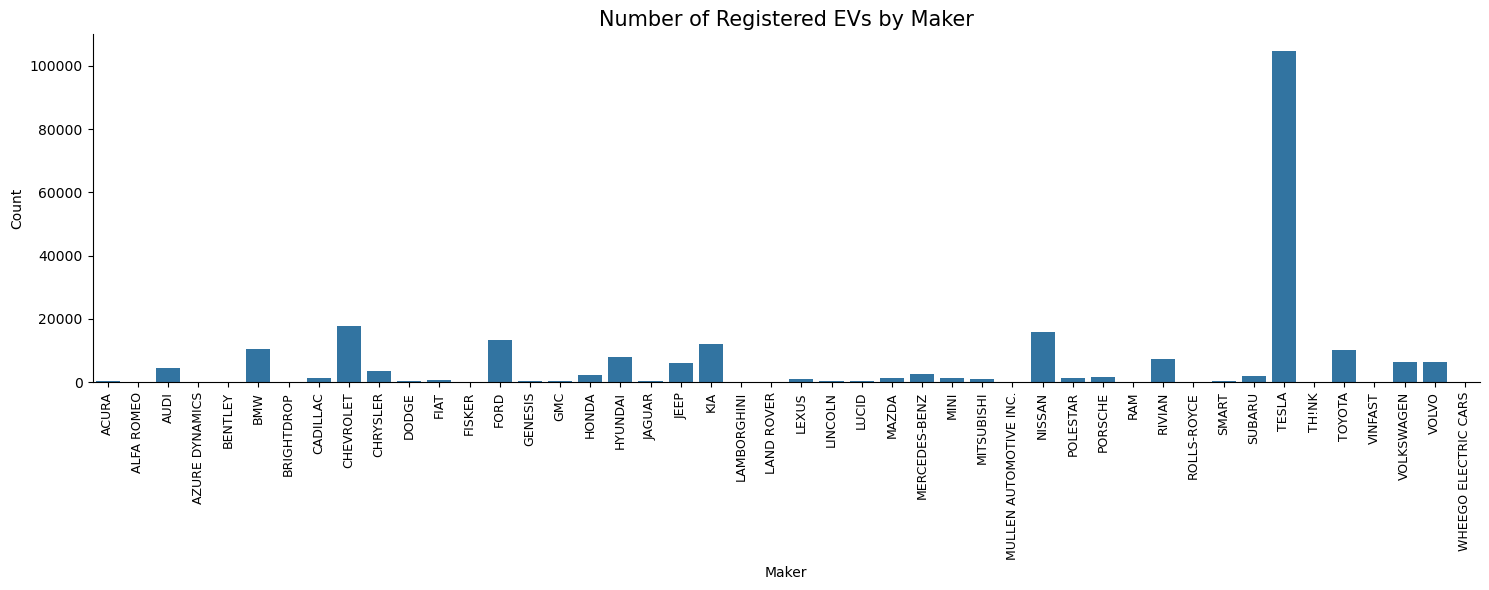

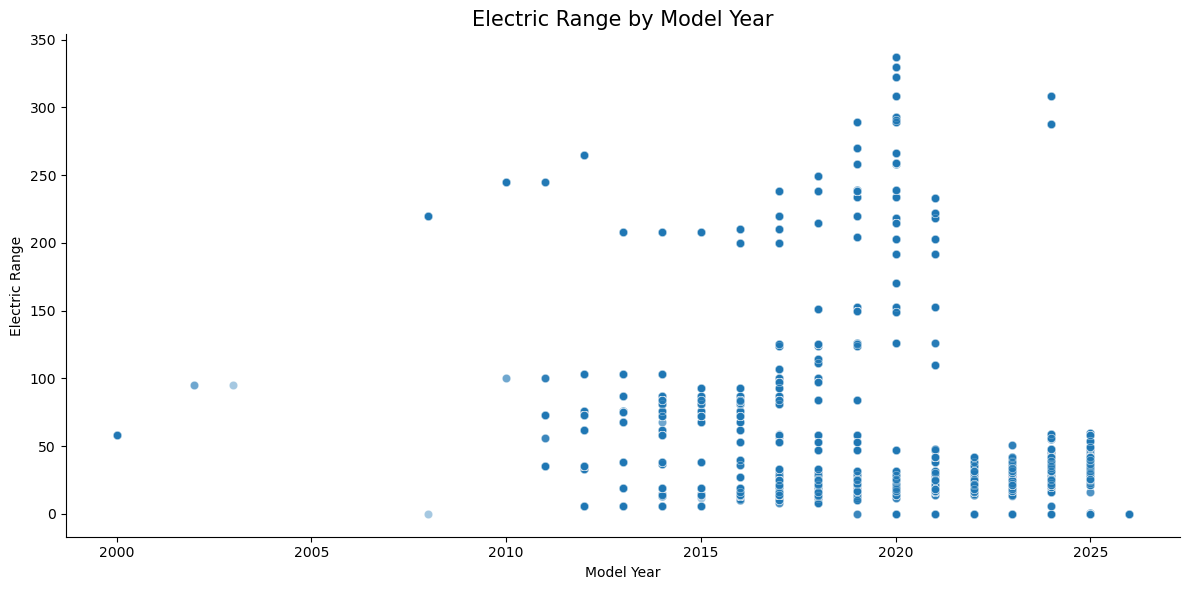

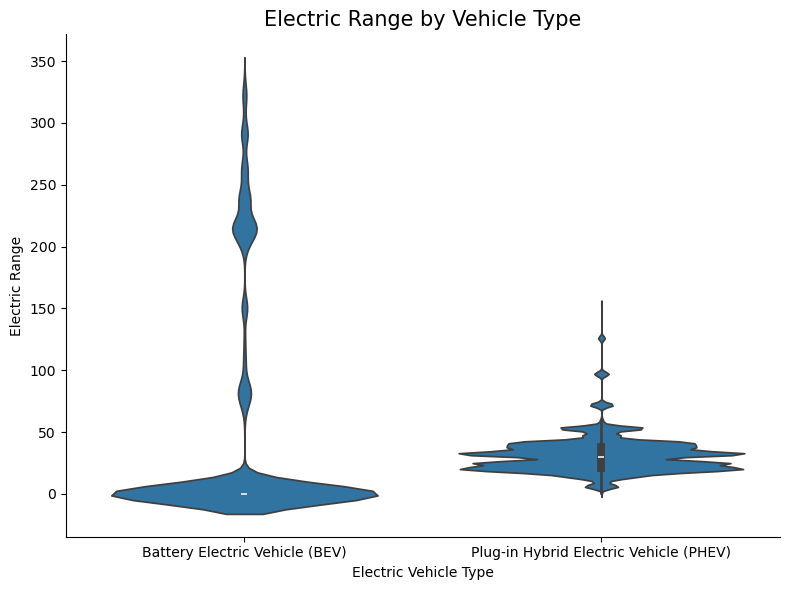

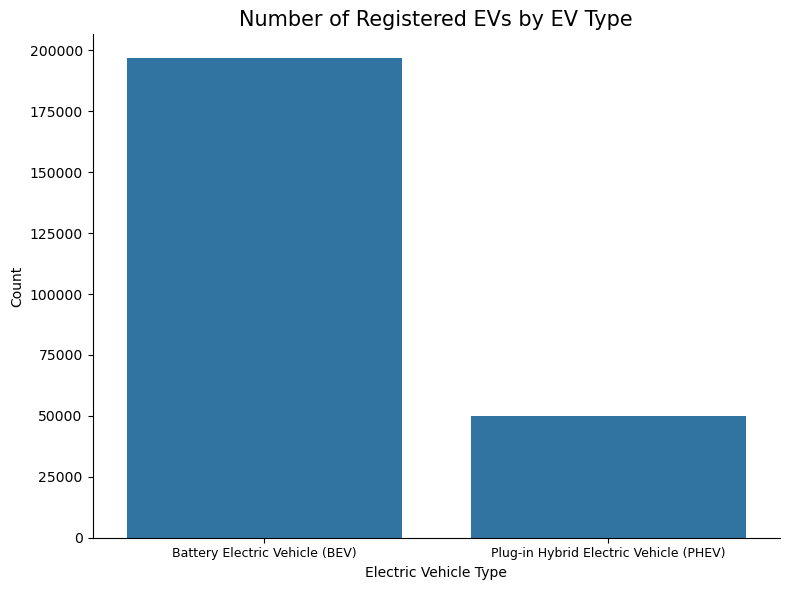

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_maker = df.pivot_table(index = "Make", values = "Model", aggfunc = "count").reset_index()
df_maker.columns = ["Maker", "Count"] #Rename the columns

#Bar Plot
plt.figure(figsize=(15, 6))
sns.barplot(data = df_maker, x = "Maker", y = "Count")
plt.xticks(fontsize = 9, rotation = 90)
plt.title("Number of Registered EVs by Maker", fontsize = 15)
plt.xlabel("Maker")
plt.ylabel("Count")
plt.tight_layout()
sns.despine()
plt.show()

#Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data = df, x = "Model Year", y = "Electric Range", alpha = 0.4)

plt.title("Electric Range by Model Year", fontsize = 15)
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.tight_layout()
sns.despine()
plt.show()

#Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data = df, x = "Electric Vehicle Type", y = "Electric Range")
plt.title("Electric Range by Vehicle Type", fontsize = 15)
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Electric Range")
plt.tight_layout()
sns.despine()
plt.show()

df_type = df.pivot_table(index = "Electric Vehicle Type", values = "Model", aggfunc = "count").reset_index()
df_type.columns = ["Electric Vehicle Type", "Count"]

#Bar Plot again
plt.figure(figsize=(8, 6))
sns.barplot(data = df_type, x = "Electric Vehicle Type", y = "Count")
plt.xticks(fontsize = 9, rotation = 0)
plt.title("Number of Registered EVs by EV Type", fontsize = 15)
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.tight_layout()
sns.despine()
plt.show()



### 5. Insights & Interpretation

Based on the bar plot of the number of registered electric vehicles by maker, we can see that Tesla has the highest number of vehicles registered in Washington. This indicates how many people rely on Tesla, an all‑electric car company, rather than on other manufacturers that produce both gas and electric vehicles. It also suggests that Tesla has been effective in promoting its products and is dominating the electric‑vehicle market.

Another interesting point comes from the violin plot of electric range by vehicle type: electric range varies significantly by type. BEVs can reach up to about 350 miles, while PHEVs top out at around 150 miles. This likely explains why more people favor BEVs over PHEVs, which is supported by the “number of registered EVs by EV type” graph showing roughly 200,000 BEV owners versus 50,000 PHEV owners.

Challenge: In order to get the same results, you just have to download the CSV file directly from the website, which I provided the link for, and correctly upload it into a DataFrame. This data is publicly available to everyone, so there shouldn't be a problem downloading the dataset. Then, only remove rows with duplicates and missing values (don't replace the NAs with other values). This ensures that the cleaned dataset will be the same as mine.